In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.cluster import KMeans, k_means
sns.set()

In [2]:
df = pd.read_csv("pre_processed.csv")
#df = df.drop(df.columns[0], axis = 1)
pd.set_option ('display.max_columns', None)
df.head()

,product_id,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,product_age,transaction_month,age_band
0,2,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,Male,19,Financial Services,Mass Customer,N,Yes,10.0,VIC,6,5,2,old
1,1,0.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,Male,19,Financial Services,Mass Customer,N,Yes,10.0,VIC,6,14,10,old
2,62,0.0,Approved,Solex,Standard,medium,medium,478.16,298.72,Male,19,Financial Services,Mass Customer,N,Yes,10.0,VIC,6,7,4,old
3,3,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,Female,89,Health,Mass Customer,N,Yes,10.0,NSW,5,3,5,young_adults
4,4,0.0,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,Female,89,Health,Mass Customer,N,Yes,10.0,NSW,5,6,10,young_adults


In [3]:

df.head()

,product_id,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,product_age,transaction_month,age_band
0,2,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,Male,19,Financial Services,Mass Customer,N,Yes,10.0,VIC,6,5,2,old
1,1,0.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,Male,19,Financial Services,Mass Customer,N,Yes,10.0,VIC,6,14,10,old
2,62,0.0,Approved,Solex,Standard,medium,medium,478.16,298.72,Male,19,Financial Services,Mass Customer,N,Yes,10.0,VIC,6,7,4,old
3,3,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,Female,89,Health,Mass Customer,N,Yes,10.0,NSW,5,3,5,young_adults
4,4,0.0,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,Female,89,Health,Mass Customer,N,Yes,10.0,NSW,5,6,10,young_adults


In [4]:


# We define a function to encode 
def wrangle(data):
    # Encoding the gender column which has only two unique observation: Male/Female
    data["gender"] = data["gender"].map({"Male":1, "Female":0})
    
    # Encoding deceased_indicator which has Y/N unique observations
    #data["deceased_indicator"] = data["deceased_indicator"].map({"N":1,"Y":0})
    
    # Encoding owns_car which also has two unique entries Yes/No
    data["owns_car"] = data["owns_car"].map({"Yes":1,"No":0})
    
    # Encoding order stantus which also has twon unique entries Approved/Cancelled
    #data["order_status"] = data["order_status"].map({"Approved":1,"Cancelled":0})
    
    # Encoding order stantus which also has twon unique entries Approved/Cancelled
    data["state"] = data["state"].map({"NSW":2,"VIC":1, "QLD":0})
    #data = data[data['state']=='VIC']
    
    
    data.drop(columns=["order_status","list_price","deceased_indicator","list_price"])
    
    return data

# Creating the cummy variables


In [5]:
df = wrangle(df)
df.head()

,product_id,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,product_age,transaction_month,age_band
0,2,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1,19,Financial Services,Mass Customer,N,1,10.0,1,6,5,2,old
1,1,0.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,1,19,Financial Services,Mass Customer,N,1,10.0,1,6,14,10,old
2,62,0.0,Approved,Solex,Standard,medium,medium,478.16,298.72,1,19,Financial Services,Mass Customer,N,1,10.0,1,6,7,4,old
3,3,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,0,89,Health,Mass Customer,N,1,10.0,2,5,3,5,young_adults
4,4,0.0,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,0,89,Health,Mass Customer,N,1,10.0,2,5,6,10,young_adults


In [6]:
# Creating the cummy variables
def dum(data):
    features = df.select_dtypes('object').columns
    new_df = pd.get_dummies(data, columns=features)
    return new_df
df = dum(df)
df.shape

(18978, 50)

In [7]:
X = df.values

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, k_means

# Standadization

In [9]:
# Standardizing the data 
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [46]:
X_std.shape

(18978, 50)

# Modelling Before PCA

In [38]:
inertia = []
clusters = range(1,10)
for k in clusters:
    
    kmeans = KMeans(n_clusters = k, init="k-means++", random_state = 3)
    kmeans = kmeans.fit(X_std)
    
    y = kmeans.inertia_
    inertia.append(y)
    
    print(f"the inertia for {k} is {kmeans.inertia_}")
    
    

the inertia for 1 is 948899.9999999977
the inertia for 2 is 904998.6468849111
the inertia for 3 is 877308.149833334
the inertia for 4 is 850611.0138014602
the inertia for 5 is 815961.6897269165
the inertia for 6 is 795700.1130281383
the inertia for 7 is 753167.0749782551
the inertia for 8 is 756062.3612944743
the inertia for 9 is 725213.2882211381


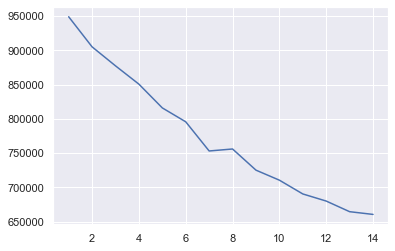

In [11]:
#Using the elbow method we check for the best
plt.plot(clusters,inertia)
plt.title("Number of Cluster VRS Inertia")
plt.xlabel("Clusters")
plt.ylabel("Inertia")

In [12]:
# after running the Elbow we chose 7 clusters for our analysis 
k = 7
kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 4)
kmeans = kmeans.fit(X_std)
kmeans.inertia_

775785.006426972

# Model Evaluation

In [37]:
prediction = kmeans.predict(X_std)
print("the predictions are: ", prediction)

# since we're using thesame data for our prediction it can be noticed that our predictions and labels are thesame
print("the labels are: " ,kmeans.labels_)

the predictions are:  [3 3 3 ... 4 1 3]
the labels are:  [3 3 3 ... 4 1 3]


In [15]:
unique, counts = np.unique(prediction, return_counts = True)

print(unique)
print(counts)

[0 1 2 3 4 5 6]
[2525 2540    8 4532 3552 3428 2393]


In [16]:
# naming our clusters 
target_name = []
for i in unique:
    tag = target_name.append(f"cluster {i}")

counts = counts.reshape(1,k)
result_counts = pd.DataFrame(counts, columns = target_name)
result_counts

,cluster 0,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6
0,2525,2540,8,4532,3552,3428,2393


# Dimensionality Reduction with PCA

In [17]:
#Initialize the pca and fit data
pca = PCA(n_components=2)
pca_trans = pca.fit_transform(X_std)

<Figure size 432x288 with 0 Axes>

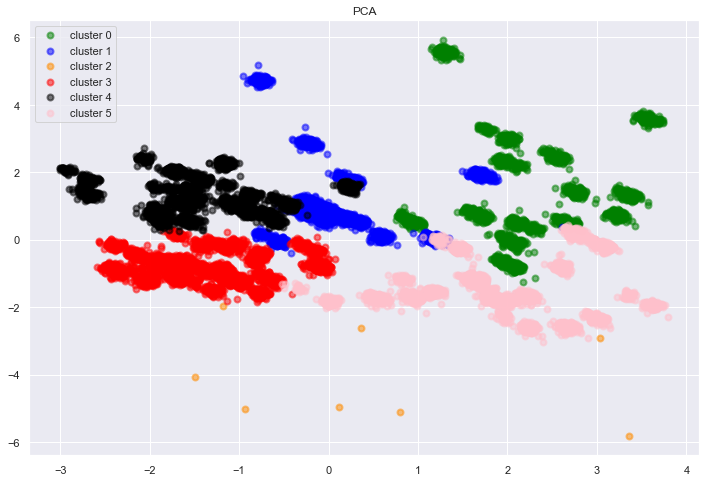

In [18]:
plt.figure()
plt.figure(figsize=(12,8))
colors = ['green','blue','darkorange','red','black','pink','yellow']
lw = 2

for color,i,target_name in zip(colors, range(0,unique.max()), target_name):
    plt.scatter(pca_trans[prediction==i,0], pca_trans[prediction==i,1], color=color, alpha = 0.5, lw=lw, label=target_name)
    #plt.scatter(kmeans.cluster_centers_[i,0],kmeans.cluster_centers_[i,1], s = 100, c="magenta", label = "Centroids")

plt.legend(loc='best')
plt.title("PCA")
plt.show() 


## Identifying the best number of components 

In [42]:
k = X.shape[1]
pca = PCA(n_components=k)
pca_trans = pca.fit_transform(X_std)

In [20]:
#PCA explained variability
var = sum(pca.explained_variance_ratio_)
print("The explained variance ration is ",var)
print("the 95% explained variability is ",var*.95)

The explained variance ration is  0.9999999999999997
the 95% explained variability is  0.9499999999999996


We will reduce the variance to 95%

In [31]:
# we get the variance with respect to the number of components used
variance_ratio = []
varinace = []
clusts = [5,10,15,20,25,30,35,40,45,50]

for i in clusts:
    
    pca = PCA(n_components = i)
    pca_trans = pca.fit_transform(X_std)
    
    v = pca.explained_variance_ratio_
    w = pca.explained_variance_
    
    sum_v = sum(v)
    sum_w = sum(w)
    variance_ratio.append(sum_v)
    variance.append(sum_w)
    
    print(f"The explained variance for {i} features is {sum_w}")

The explained variance for 5 features is 11.177114416422151
The explained variance for 10 features is 19.207974017942757
The explained variance for 15 features is 25.905360630060354
The explained variance for 20 features is 31.651985174737078
The explained variance for 25 features is 37.0948427323851
The explained variance for 30 features is 42.177121616549535
The explained variance for 35 features is 46.77152382677243
The explained variance for 40 features is 49.8202452572139
The explained variance for 45 features is 50.002634768403844
The explained variance for 50 features is 50.002634768403844


From the above we can clearly observe that 35 features is much closer to our 95% variability.

Text(0, 0.5, 'Explained variance ratio')

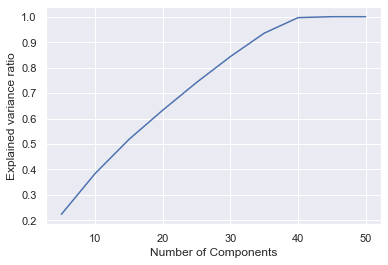

In [ ]:
plt.plot(variance_ratio)
plt.xlabel("Number of Components")
plt.ylabel("Explained variance ratio")

from the above the above we can see that from 40 the line stopes moving which means only fourty components are usefull for our prediction. Since we set a treshhold at

## Modeling after running the PCA

Text(0, 0.5, 'Inertia')

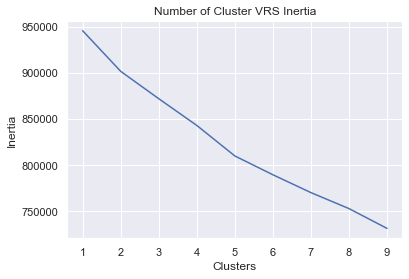

In [43]:
# Running the PCA again 
pca = PCA(n_components = 40, random_state = 12)
pca_trans = pca.fit_transform(X_std)

# Running the model again with 40 components 
inertia = []
clusters = range(1,10)
for k in clusters:
    
    kmeans = KMeans(n_clusters = k, init="k-means++", random_state = 3)
    kmeans = kmeans.fit(pca_trans)
    
    y = kmeans.inertia_
    inertia.append(y)

# Plotting the Inertia 
plt.plot(clusters,inertia)
plt.title("Number of Cluster VRS Inertia")
plt.xlabel("Clusters")
plt.ylabel("Inertia")
    


we manage to improve our result by reducing the inertia

In [48]:
# looking from the above the elbow is at 5
k = 5
kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 4)
kmeans = kmeans.fit(pca_trans)
print("The inertia with 5 cluster is ", kmeans.inertia_)

prediction = kmeans.predict(pca_trans)
print("the predictions are: ", prediction)
# since we're using thesame data for our prediction it can be noticed that our predictions and labels are thesame
print("the labels are: " ,kmeans.labels_)

# Extraction of counts and unique vals
unique, counts = np.unique(prediction, return_counts = True)
#print(,unique)
#print(counts)

# renaming our clusters 
target_name = []
for i in unique:
    tag = target_name.append(f"cluster {i}")
    
#print(target_name)

counts = counts.reshape(1,k)
result_counts = pd.DataFrame(counts, columns = target_name)
print(result_counts)

812965.5486685119
the predictions are:  [1 3 1 ... 0 4 1]
the labels are:  [1 3 1 ... 0 4 1]
[0 1 2 3 4]
[1170 9066    8 4531 4203]
['cluster 0', 'cluster 1', 'cluster 2', 'cluster 3', 'cluster 4']
   cluster 0  cluster 1  cluster 2  cluster 3  cluster 4
0       1170       9066          8       4531       4203


<Figure size 432x288 with 0 Axes>

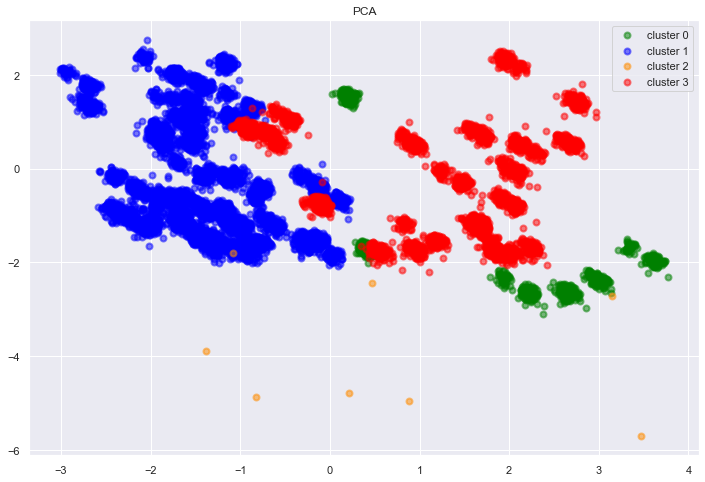

In [49]:
#Initialize the pca and fit data
pca = PCA(n_components=2)
pca_trans = pca.fit_transform(pca_trans)


plt.figure()
plt.figure(figsize=(12,8))
colors = ['green','blue','darkorange','red','black']
lw = 2

for color,i,target_name in zip(colors, range(0,unique.max()), target_name):
    plt.scatter(pca_trans[prediction==i,0], pca_trans[prediction==i,1], color=color, alpha = 0.5, lw=lw, label=target_name)
    #plt.scatter(kmeans.cluster_centers_[i,0],kmeans.cluster_centers_[i,1], s = 100, c="magenta", label = "Centroids")

plt.legend(loc='best')
plt.title("PCA")
plt.show() 


Text(0, 0.5, 'Explained variance ratio')

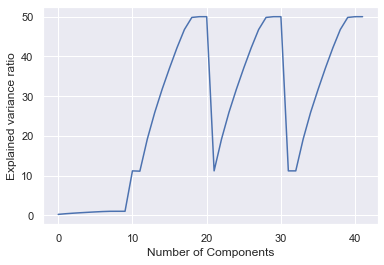

In [35]:
plt.plot(variance)
plt.xlabel("Number of Components")
plt.ylabel("Explained variance ratio")

In [36]:
variance

[0.22249124712311774,
 0.38331927672379057,
 0.5170912328281037,
 0.6340764752752586,
 0.7419622930710033,
 0.84349798328348,
 0.9353811862795458,
 0.9963524019877206,
 0.9999999999999997,
 0.9999999999999997,
 11.174984738339369,
 11.102278039241117,
 19.169542821676295,
 25.86336917977327,
 31.734466353860856,
 37.08710352112403,
 42.17710972741557,
 46.77152382677244,
 49.8202452572139,
 50.002634768403844,
 50.002634768403844,
 11.177745347960022,
 19.18549644643185,
 25.908628950681273,
 31.72737294573919,
 37.112663649060146,
 42.17711823194911,
 46.77152382677243,
 49.8202452572139,
 50.002634768403844,
 50.002634768403844,
 11.174014270111332,
 11.177114416422151,
 19.207974017942757,
 25.905360630060354,
 31.651985174737078,
 37.0948427323851,
 42.177121616549535,
 46.77152382677243,
 49.8202452572139,
 50.002634768403844,
 50.002634768403844]

In [10]:
#transforming the data 
X_pca = pca.transform(X_std)

In [11]:
# plt.scatter(X_pca[:,0], X_pca[:,1])
# plt.xlabel("Principal component 1")
# plt.ylabel("Principal component 2")
# plt.show()

In [13]:
X_pca.inertia_

NameError: name 'X_pca' is not defined

In [10]:
v = pca.explained_variance_ratio_
v

array([5.57422818e-02, 4.83381759e-02, 4.06734830e-02, 4.02367077e-02,
       3.92676103e-02, 3.65803806e-02, 3.40166019e-02, 3.11657403e-02,
       3.04331392e-02, 2.94942260e-02, 2.87873220e-02, 2.86603298e-02,
       2.75190245e-02, 2.53334923e-02, 2.49356123e-02, 2.42870556e-02,
       2.38122476e-02, 2.34078165e-02, 2.27023361e-02, 2.24277329e-02,
       2.15971843e-02, 2.13870559e-02, 2.11334041e-02, 2.09848681e-02,
       2.06465500e-02, 2.05584638e-02, 2.01677447e-02, 1.98698726e-02,
       1.97020550e-02, 1.96294951e-02, 1.92218485e-02, 1.89544518e-02,
       1.86780650e-02, 1.81148278e-02, 1.69139833e-02, 1.50276830e-02,
       1.23279902e-02, 1.17439490e-02, 1.11412081e-02, 1.07303854e-02,
       3.64759801e-03, 2.20421230e-32, 1.04517954e-32, 5.79139420e-33,
       2.60583376e-33, 2.43443856e-33, 1.42549814e-33, 1.29278741e-33,
       3.87130845e-34, 1.95223570e-34])

In [11]:
sum(v)

0.9999999999999997